In [19]:
# Imports and path additions:

import sys
import string
import nltk
import re
sys.path.insert(0, '../')
from ourCode import sentiment_Analysis

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


## Loading data from class
This read the specified txt file and returns the dictionary

In [20]:
# Create object of sentiment_Analysis class
testObject = sentiment_Analysis()
testDict = testObject.get_data('loadData', fileName='../data/test_AOC.txt')


This is example showing the scraping process using NLTK module

In [22]:
txt = []
keys = testDict.keys()
clean_dict = dict()
for i in keys:
    for j in testDict[i]:
        temp = j.translate(str.maketrans('', '', string.punctuation)).strip()
        if i in clean_dict.keys():
            clean_dict[i].append(temp.lower().split())
        else:
            clean_dict[i] = [temp.lower().split()]
            
sr= stopwords.words('english')
new_sr = sr.append('amp')
clean_word = []
prefixes = ('https')
lemmatizer = WordNetLemmatizer()

for i in clean_dict.keys():
    for line in clean_dict[i]:
        for word in line:
            temp = re.sub(r'[^\w\s]', '', word)
            if temp not in sr and len(temp)>2 and not temp.startswith(prefixes):
                lemma = lemmatizer.lemmatize(temp, pos='v')
                clean_word.append(lemma)
    clean_dict[i] = clean_word
        

In [12]:
clean_dict

{'AOC': ['obrigada',
  'por',
  'ter',
  'vido',
  'dep',
  'molon',
  'brazils',
  'stewardship',
  'amazon',
  'place',
  'critical',
  'part',
  'worlds',
  'climate',
  'security',
  'hand',
  'great',
  'meet',
  'congressional',
  'leader',
  'brazils',
  'progressive',
  'coalition',
  'discuss',
  'bring',
  'greennewdeal',
  'principles',
  'abroad',
  'shout',
  'repjayapal',
  'lead',
  'medicare',
  'leadership',
  'm4a',
  'house',
  'make',
  'stronger',
  'ever',
  'also',
  'secure',
  'firstever',
  'hear',
  'bill',
  'history',
  'consultants',
  'medicare',
  'insanely',
  'popular',
  'proposal',
  'maybe',
  'try',
  'policies',
  'guarantee',
  'healthcare',
  'people',
  'walmart',
  'exxon',
  'wall',
  'corps',
  'rely',
  'underpay',
  'people',
  'cut',
  'benefit',
  'skirt',
  'tax',
  'excess',
  'profit',
  'consultants',
  'important',
  'note',
  'people',
  'shouldnt',
  'situation',
  'depend',
  'strangers',
  'enormous',
  'act',
  'charity',
  'ki

<FreqDist with 111 samples and 118 outcomes>


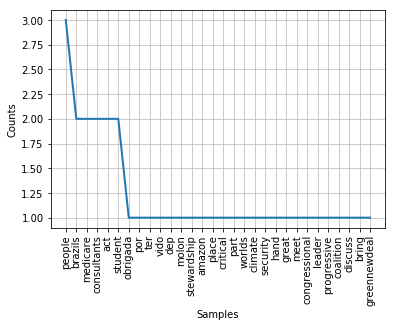

In [23]:
from nltk.probability import FreqDist
fdist = FreqDist(clean_word)
print(fdist)
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [25]:
l = testObject.scrape_tweet(testDict)
l

{}